Classification Accuracies:
Degree     Train Accuracy  Validation Accuracy Test Accuracy  
1          0.93            0.93                0.89           
2          0.76            0.77                0.71           
3          0.94            0.92                0.88           
4          0.63            0.61                0.57           
5          0.83            0.87                0.86           


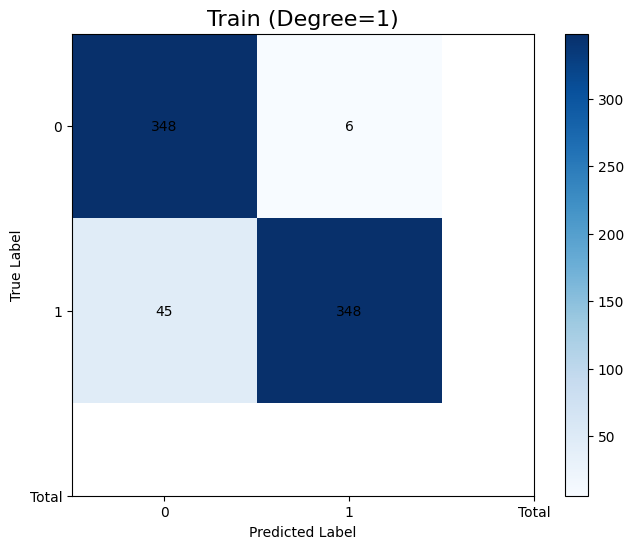

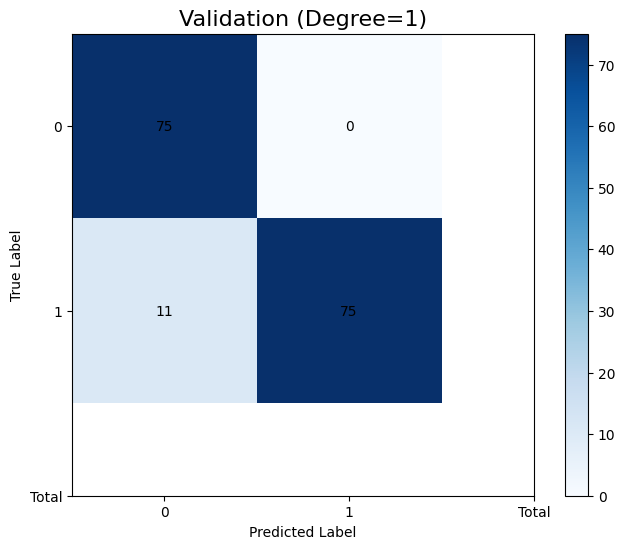

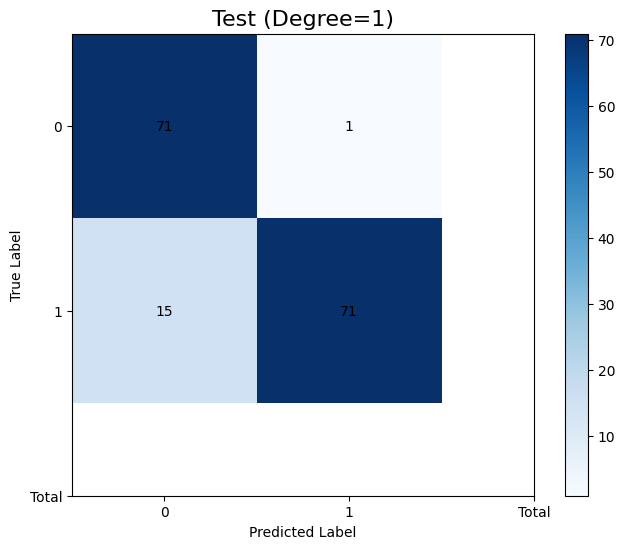

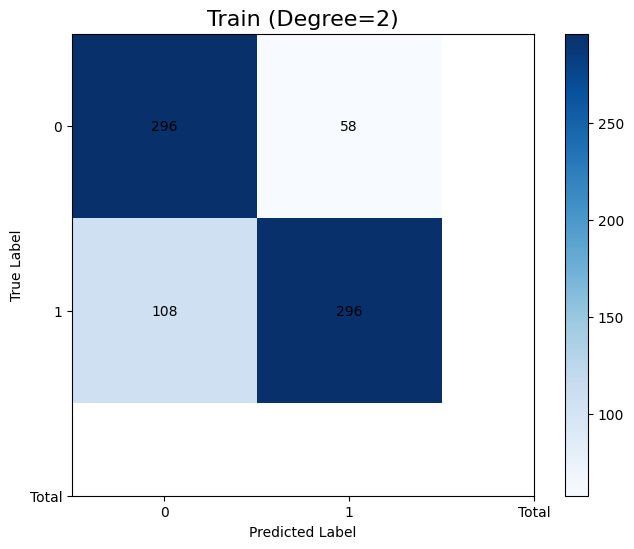

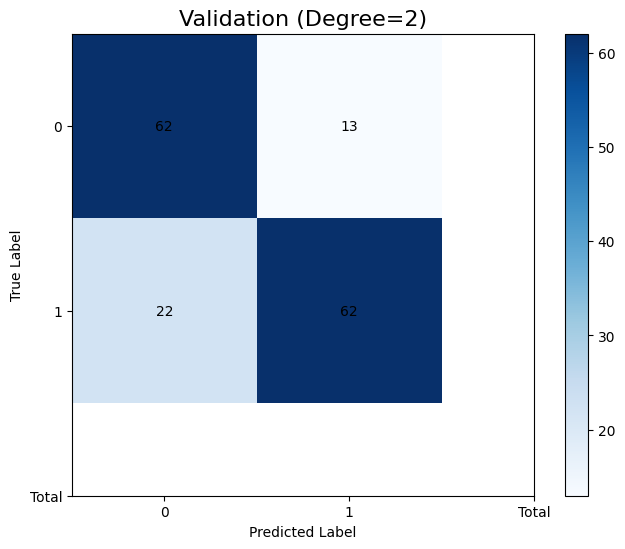

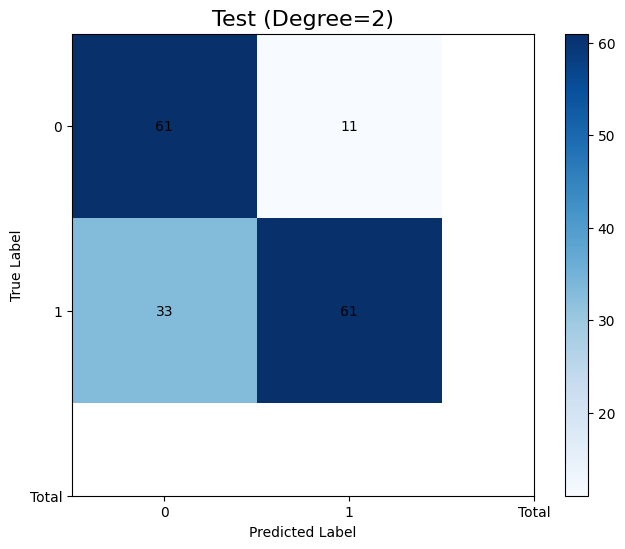

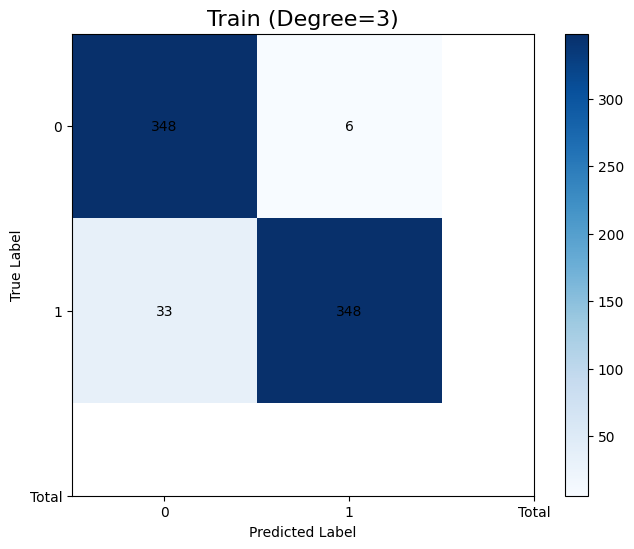

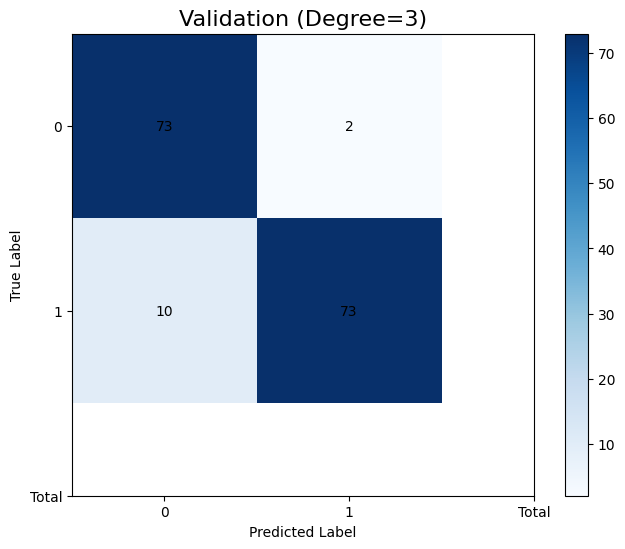

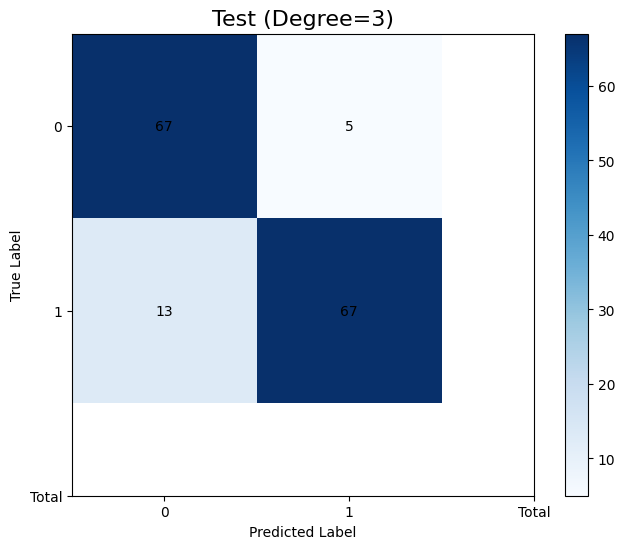

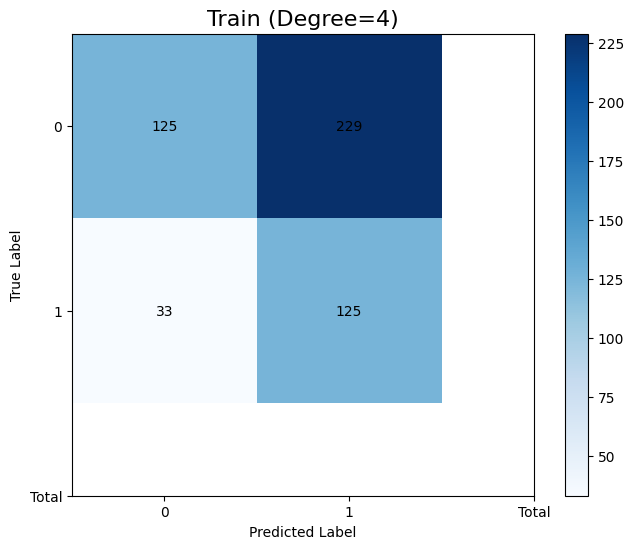

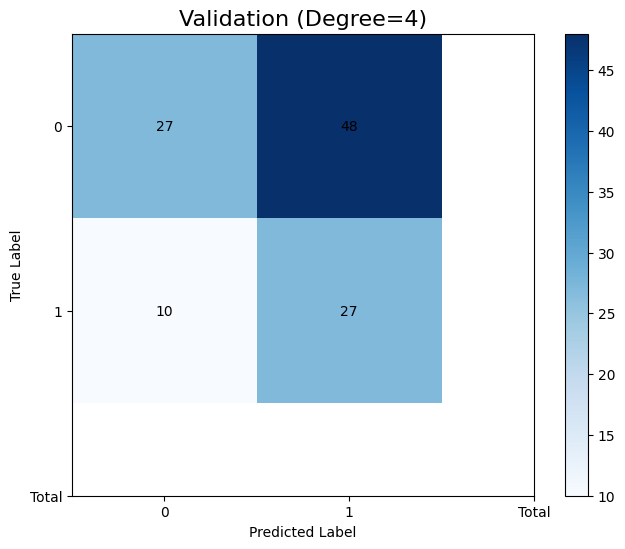

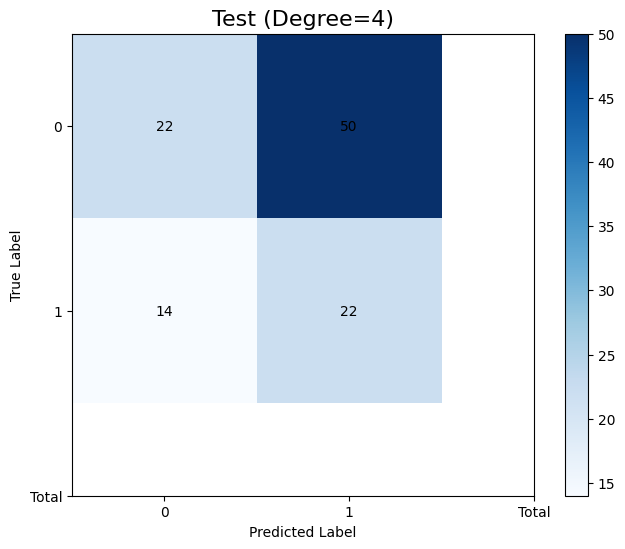

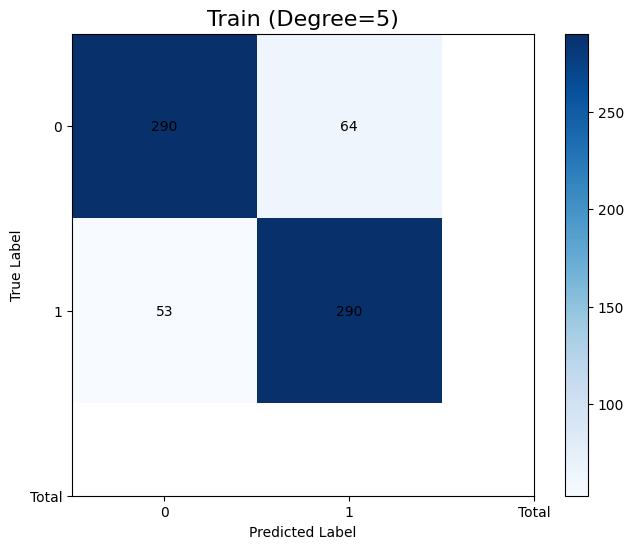

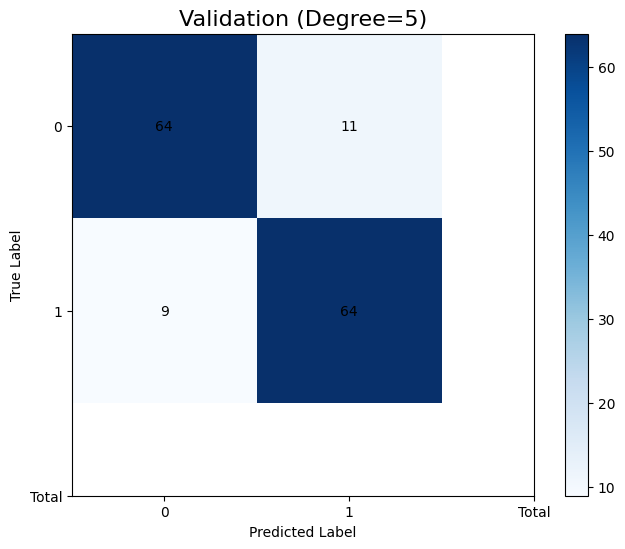

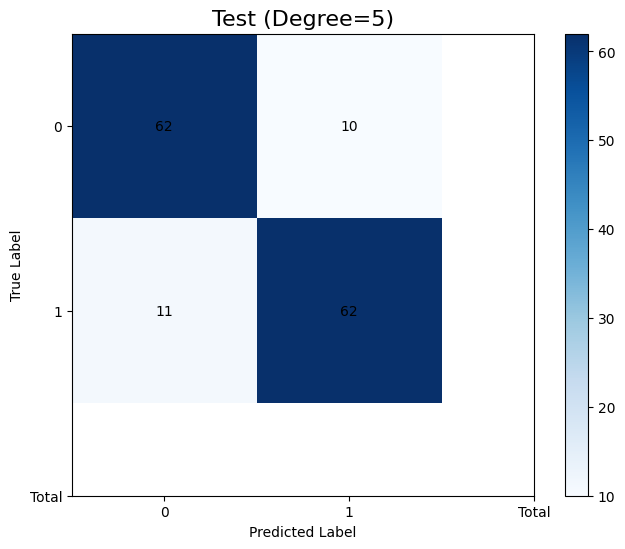

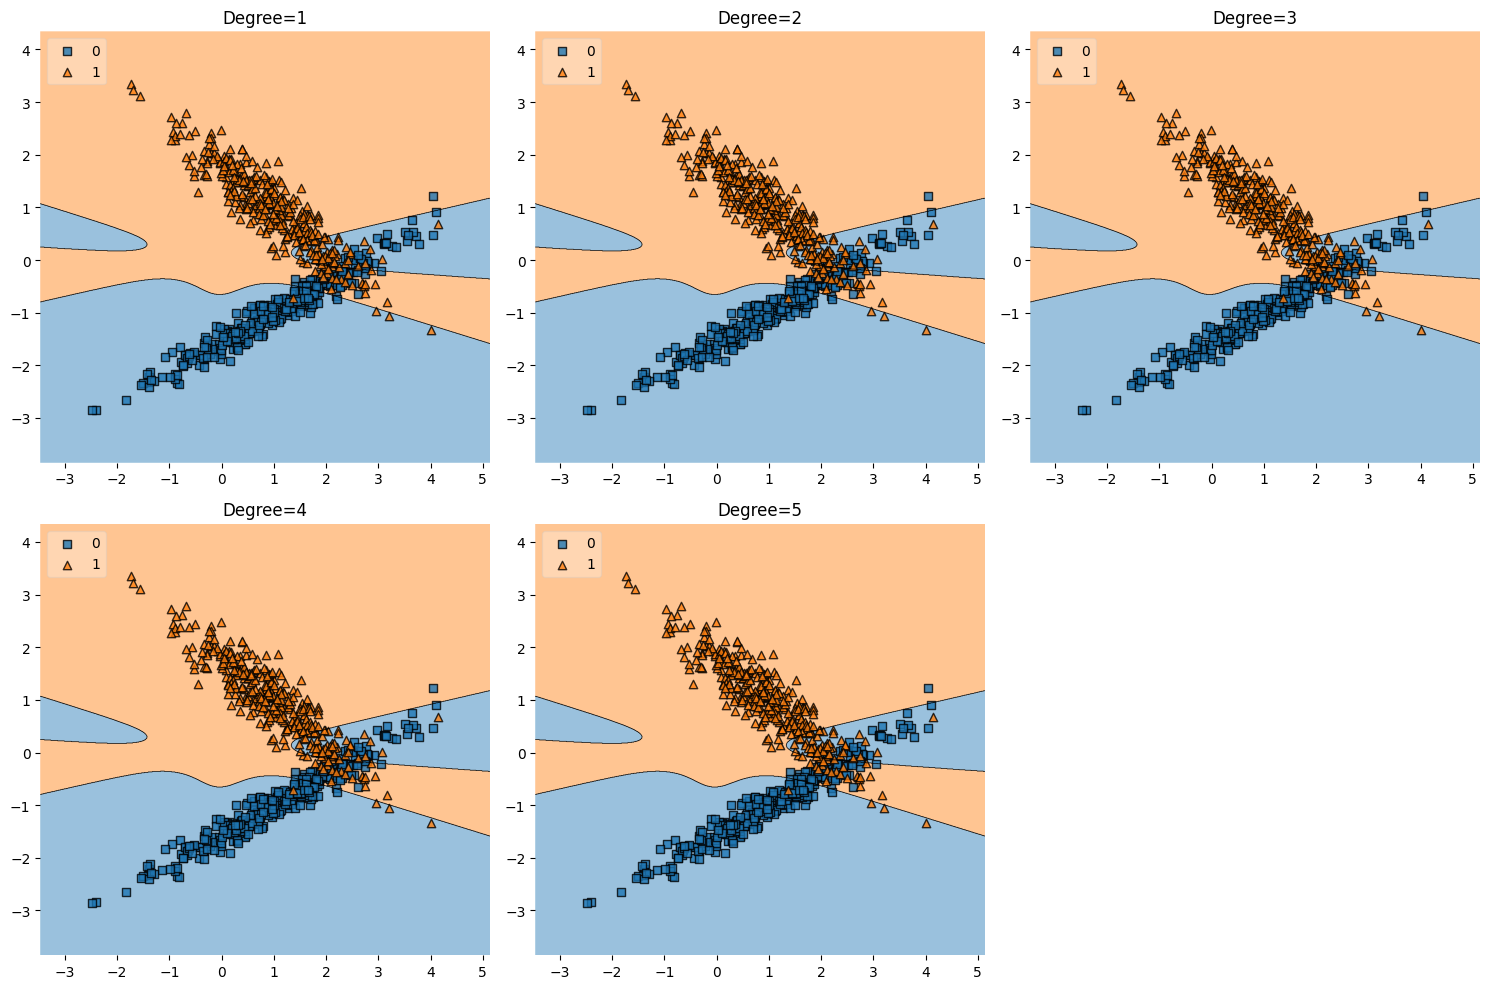

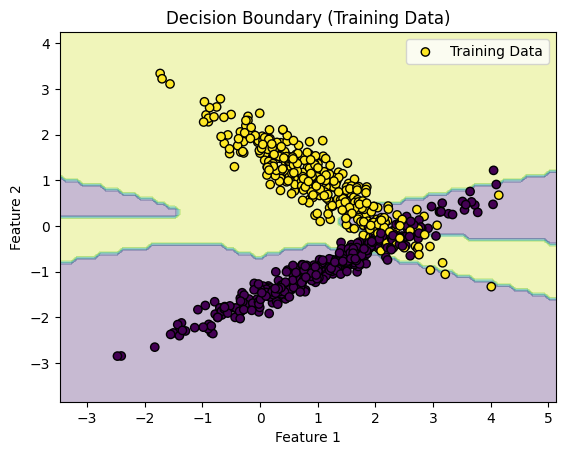

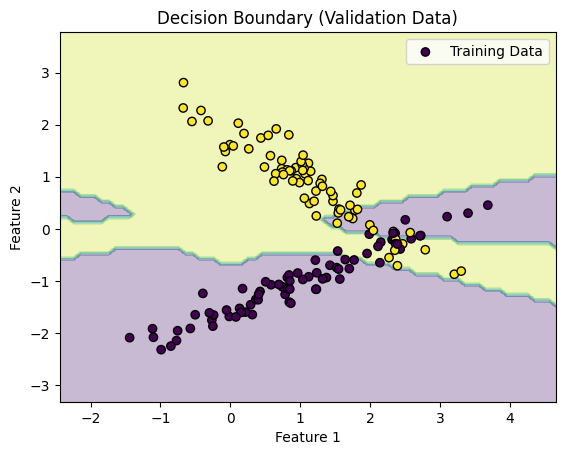

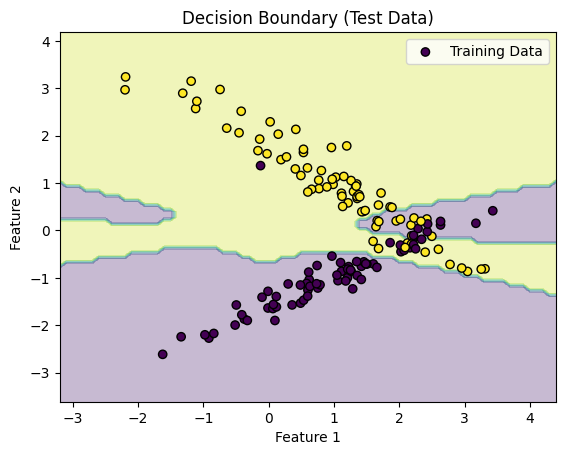

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define different degrees of polynomial kernel
degrees = [1, 2, 3, 4, 5]

# Dictionary to store results
results = {}

# Function to evaluate the model and generate confusion matrix
def evaluate_model(model, X, y):
    # Predictions
    y_pred = model.predict(X)

    # Classification accuracy
    accuracy = np.mean(y_pred == y)

    # Confusion matrix
    cm = confusion_matrix(y, y_pred)

    return accuracy, cm

# Loop over different degrees of polynomial kernel
for degree in degrees:
    # Train the SVM model
    model = SVC(kernel='poly', degree=degree)
    model.fit(X_train, y_train)

    # Evaluate the model on training data
    train_accuracy, train_cm = evaluate_model(model, X_train, y_train)

    # Evaluate the model on validation data
    val_accuracy, val_cm = evaluate_model(model, X_val, y_val)

    # Evaluate the model on test data
    test_accuracy, test_cm = evaluate_model(model, X_test, y_test)

    # Store results
    results[degree] = {
        'train_accuracy': train_accuracy,
        'val_accuracy': val_accuracy,
        'test_accuracy': test_accuracy,
        'train_cm': train_cm,
        'val_cm': val_cm,
        'test_cm': test_cm
    }

# Print the table of classification accuracies
print("Classification Accuracies:")
print("{:<10} {:<15} {:<15} {:<15}".format("Degree", "Train Accuracy", "Validation Accuracy", "Test Accuracy"))
for degree, result in results.items():
    print("{:<10} {:<15.2f} {:<19.2f} {:<15.2f}".format(degree, result['train_accuracy'], result['val_accuracy'], result['test_accuracy']))

# Function to plot confusion matrix
def plot_confusion_matrix(cm, accuracy, title):
    cm_numeric = cm.astype(float)  # Convert confusion matrix to float
    cm_numeric[-1, -1] = np.sum(cm_numeric[:-1, :-1])  # Total count
    
    # Determine the size of the confusion matrix
    n_rows, n_cols = cm_numeric.shape

    plt.figure(figsize=(8, 6))
    plt.imshow(cm_numeric, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title, fontsize=16)
    plt.colorbar()
    labels = [str(i) for i in range(n_cols)] + ["Total"]
    plt.xticks(range(n_cols + 1), labels)
    plt.yticks(range(n_rows + 1), labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    
    # Add text annotations
    for i in range(n_rows):
        for j in range(n_cols):
            plt.text(j, i, int(cm_numeric[i, j]), ha="center", va="center", color="black")

    plt.show()

# Plot confusion matrices
for degree, result in results.items():
    plot_confusion_matrix(result['train_cm'], result['train_accuracy'], title=f"Train (Degree={degree})")
    plot_confusion_matrix(result['val_cm'], result['val_accuracy'], title=f"Validation (Degree={degree})")
    plot_confusion_matrix(result['test_cm'], result['test_accuracy'], title=f"Test (Degree={degree})")


# Plot decision boundaries
plt.figure(figsize=(15, 10))
for i, degree in enumerate(degrees):
    plt.subplot(2, 3, i + 1)
    plot_decision_regions(X_train, y_train, clf=model, legend=2)
    plt.title(f'Degree={degree}')
plt.tight_layout()
plt.show()


def plot_decision_boundary(X, y, model, title):
    # Create a meshgrid of points covering the feature space
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                           np.arange(x2_min, x2_max, 0.1))
    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    # Plot decision boundaries
    plt.contourf(xx1, xx2, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolors='k', label='Training Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot decision boundaries for training data
plot_decision_boundary(X_train, y_train, model, title='Decision Boundary (Training Data)')

# Plot decision boundaries for validation data
plot_decision_boundary(X_val, y_val, model, title='Decision Boundary (Validation Data)')

# Plot decision boundaries for test data
plot_decision_boundary(X_test, y_test, model, title='Decision Boundary (Test Data)')

Classification Accuracies:
Train Accuracy  Validation Accuracy Test Accuracy  
0.93            0.93                0.90           


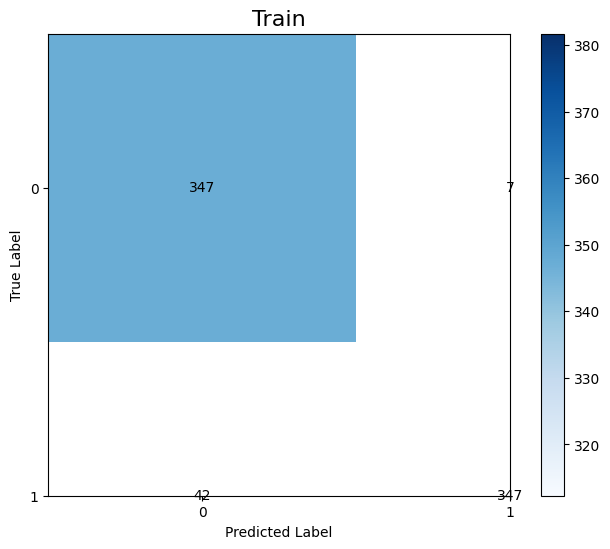

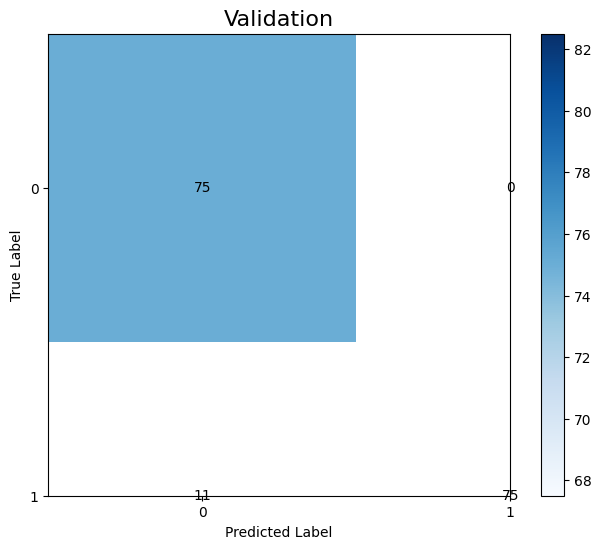

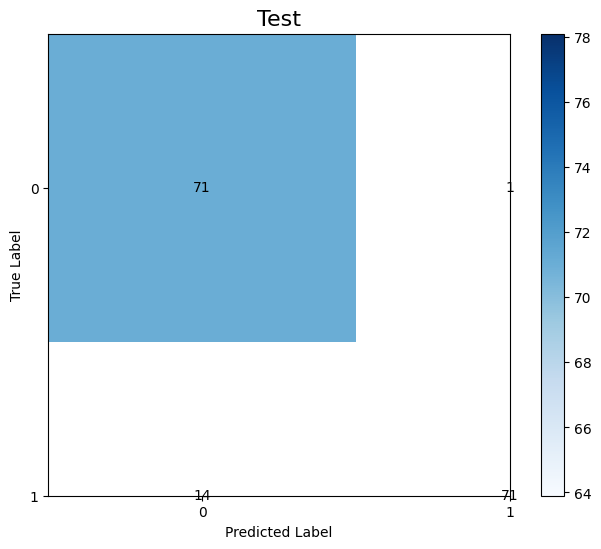

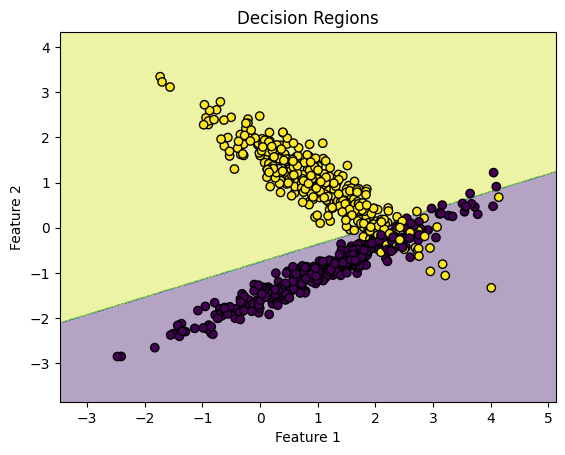

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train the SVM model with linear kernel
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Function to evaluate the model and generate confusion matrix
def evaluate_model(model, X, y):
    # Predictions
    y_pred = model.predict(X)

    # Classification accuracy
    accuracy = np.mean(y_pred == y)

    # Confusion matrix
    cm = confusion_matrix(y, y_pred)

    return accuracy, cm

# Evaluate the model on training data
train_accuracy, train_cm = evaluate_model(model, X_train, y_train)

# Evaluate the model on validation data
val_accuracy, val_cm = evaluate_model(model, X_val, y_val)

# Evaluate the model on test data
test_accuracy, test_cm = evaluate_model(model, X_test, y_test)

# Print the table of classification accuracies
print("Classification Accuracies:")
print("{:<15} {:<15} {:<15}".format("Train Accuracy", "Validation Accuracy", "Test Accuracy"))
print("{:<15.2f} {:<19.2f} {:<15.2f}".format(train_accuracy, val_accuracy, test_accuracy))

# Function to plot confusion matrix
def plot_confusion_matrix(cm, accuracy, title):
    cm_numeric = cm.astype(float)  # Convert confusion matrix to float
    cm_numeric[-1, -1] = np.sum(cm_numeric[:-1, :-1])  # Total count

    plt.figure(figsize=(8, 6))
    plt.imshow(cm_numeric[:-1, :-1], interpolation="nearest", cmap=plt.cm.Blues)  # Exclude last row and column
    plt.title(title, fontsize=16)
    plt.colorbar()
    labels = ["0", "1"]
    plt.xticks(range(2), labels)
    plt.yticks(range(2), labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    
    # Add text annotations
    for i in range(2):
        for j in range(2):
            plt.text(j, i, int(cm_numeric[i, j]), ha="center", va="center", color="black")

    plt.show()

# Plot confusion matrices
plot_confusion_matrix(train_cm, train_accuracy, title="Train")
plot_confusion_matrix(val_cm, val_accuracy, title="Validation")
plot_confusion_matrix(test_cm, test_accuracy, title="Test")

# Function to plot decision regions
def plot_decision_regions(X, y, classifier):
    h = 0.02  # step size in the mesh

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolors='k')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Regions')
    plt.show()

# Plot decision regions for training data
plot_decision_regions(X_train, y_train, model)


Classification Accuracies:
Degree     Train Accuracy  Validation Accuracy Test Accuracy  
1          0.93            0.93                0.90           


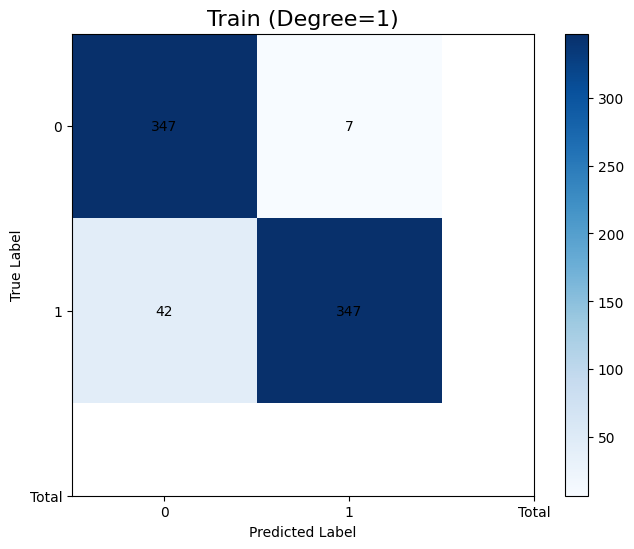

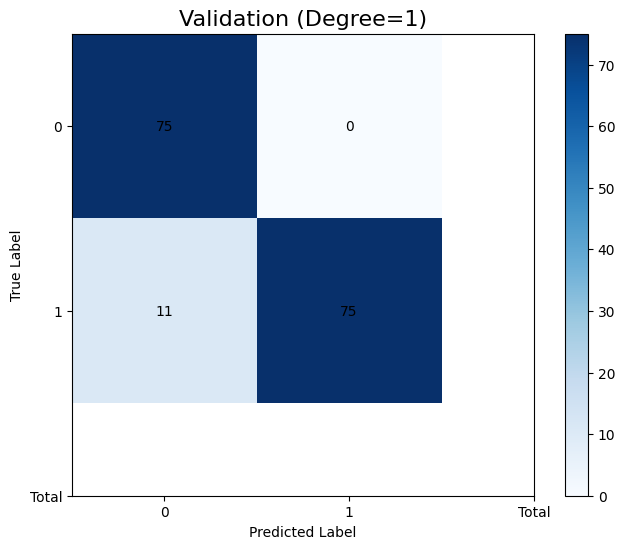

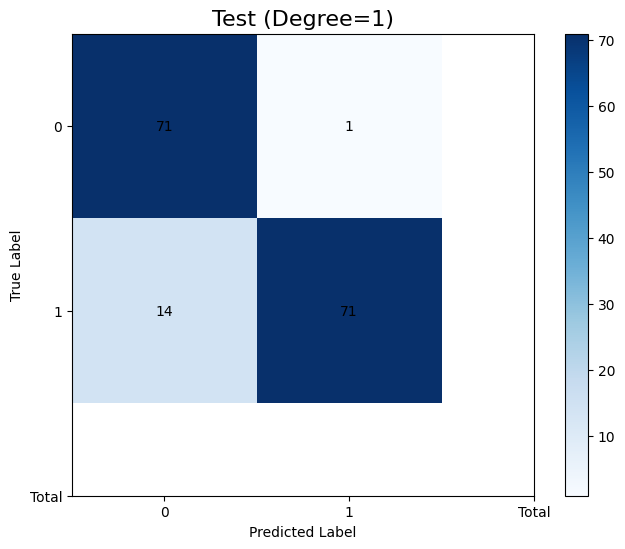

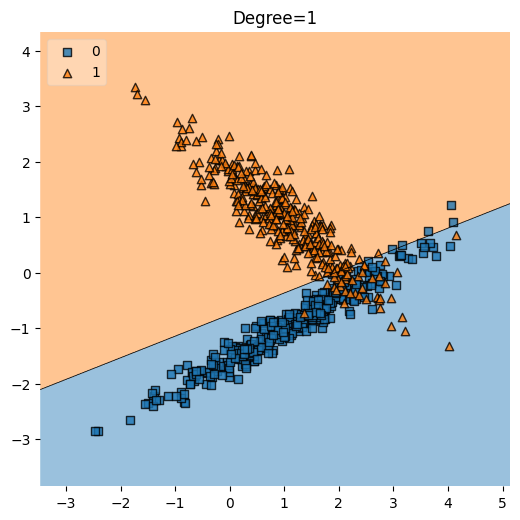

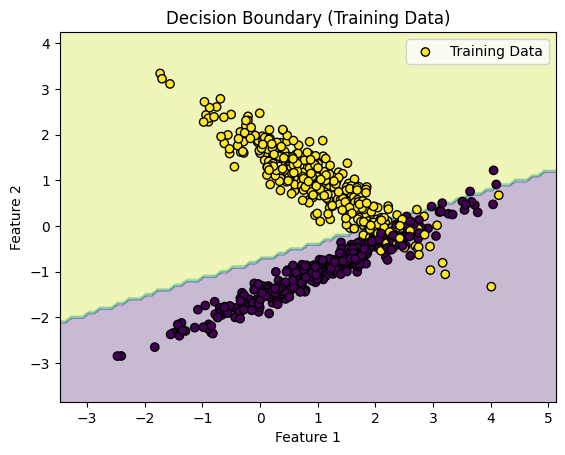

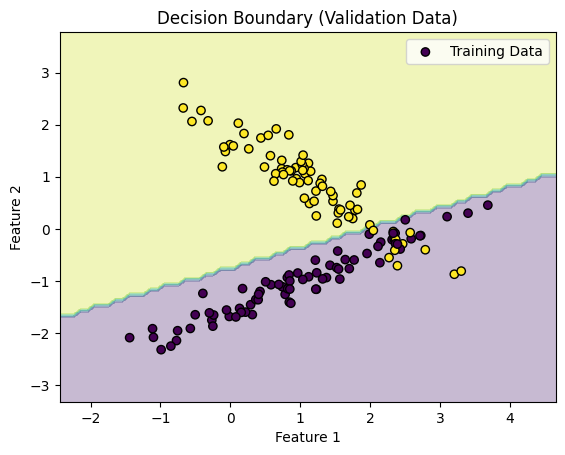

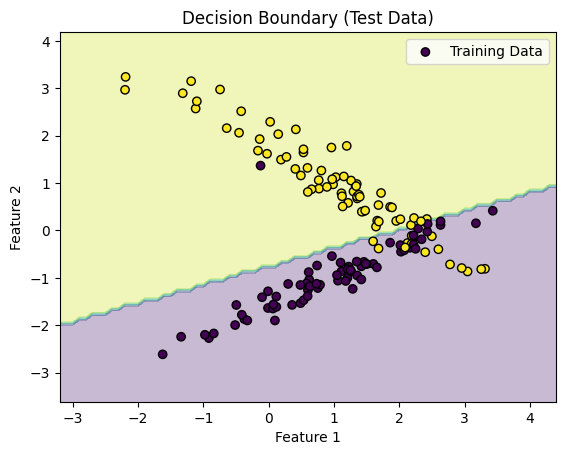

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define different degrees of polynomial kernel
degrees = [1]

# Dictionary to store results
results = {}

# Function to evaluate the model and generate confusion matrix
def evaluate_model(model, X, y):
    # Predictions
    y_pred = model.predict(X)

    # Classification accuracy
    accuracy = np.mean(y_pred == y)

    # Confusion matrix
    cm = confusion_matrix(y, y_pred)

    return accuracy, cm

# Loop over different degrees of polynomial kernel
for degree in degrees:
    # Train the SVM model
    model = SVC(kernel='linear')
    model.fit(X_train, y_train)

    # Evaluate the model on training data
    train_accuracy, train_cm = evaluate_model(model, X_train, y_train)

    # Evaluate the model on validation data
    val_accuracy, val_cm = evaluate_model(model, X_val, y_val)

    # Evaluate the model on test data
    test_accuracy, test_cm = evaluate_model(model, X_test, y_test)

    # Store results
    results[degree] = {
        'train_accuracy': train_accuracy,
        'val_accuracy': val_accuracy,
        'test_accuracy': test_accuracy,
        'train_cm': train_cm,
        'val_cm': val_cm,
        'test_cm': test_cm
    }

# Print the table of classification accuracies
print("Classification Accuracies:")
print("{:<10} {:<15} {:<15} {:<15}".format("Degree", "Train Accuracy", "Validation Accuracy", "Test Accuracy"))
for degree, result in results.items():
    print("{:<10} {:<15.2f} {:<19.2f} {:<15.2f}".format(degree, result['train_accuracy'], result['val_accuracy'], result['test_accuracy']))

# Function to plot confusion matrix
def plot_confusion_matrix(cm, accuracy, title):
    cm_numeric = cm.astype(float)  # Convert confusion matrix to float
    cm_numeric[-1, -1] = np.sum(cm_numeric[:-1, :-1])  # Total count
    
    # Determine the size of the confusion matrix
    n_rows, n_cols = cm_numeric.shape

    plt.figure(figsize=(8, 6))
    plt.imshow(cm_numeric, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title, fontsize=16)
    plt.colorbar()
    labels = [str(i) for i in range(n_cols)] + ["Total"]
    plt.xticks(range(n_cols + 1), labels)
    plt.yticks(range(n_rows + 1), labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    
    # Add text annotations
    for i in range(n_rows):
        for j in range(n_cols):
            plt.text(j, i, int(cm_numeric[i, j]), ha="center", va="center", color="black")

    plt.show()

# Plot confusion matrices
for degree, result in results.items():
    plot_confusion_matrix(result['train_cm'], result['train_accuracy'], title=f"Train (Degree={degree})")
    plot_confusion_matrix(result['val_cm'], result['val_accuracy'], title=f"Validation (Degree={degree})")
    plot_confusion_matrix(result['test_cm'], result['test_accuracy'], title=f"Test (Degree={degree})")


# Plot decision boundaries
plt.figure(figsize=(15, 10))
for i, degree in enumerate(degrees):
    plt.subplot(2, 3, i + 1)
    plot_decision_regions(X_train, y_train, clf=model, legend=2)
    plt.title(f'Degree={degree}')
plt.tight_layout()
plt.show()


def plot_decision_boundary(X, y, model, title):
    # Create a meshgrid of points covering the feature space
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                           np.arange(x2_min, x2_max, 0.1))
    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    # Plot decision boundaries
    plt.contourf(xx1, xx2, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolors='k', label='Training Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot decision boundaries for training data
plot_decision_boundary(X_train, y_train, model, title='Decision Boundary (Training Data)')

# Plot decision boundaries for validation data
plot_decision_boundary(X_val, y_val, model, title='Decision Boundary (Validation Data)')

# Plot decision boundaries for test data
plot_decision_boundary(X_test, y_test, model, title='Decision Boundary (Test Data)')

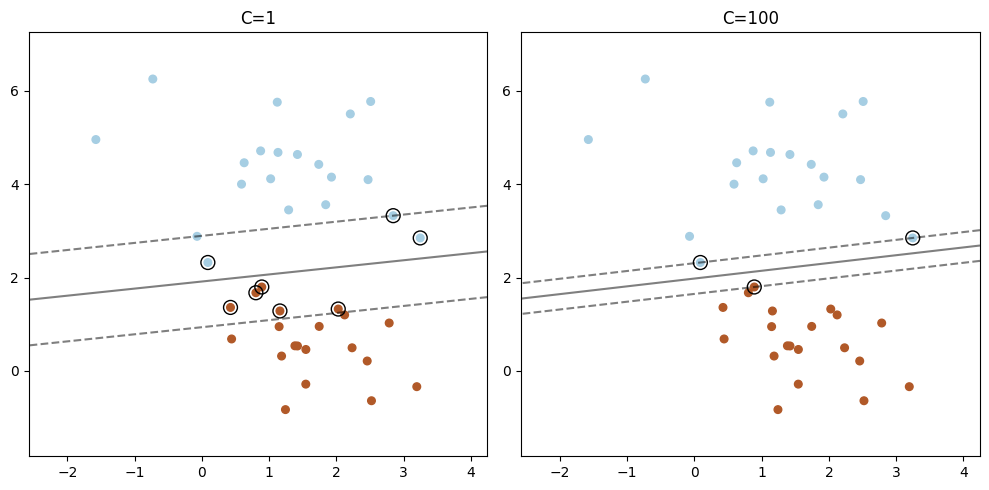

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import LinearSVC

X, y = make_blobs(n_samples=40, centers=2, random_state=0)

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42, dual="auto").fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()